 # Reserach Paper

 ### Mohanned Khairy    
 ### Msc Program 2022
UofK College of Mathematical Science

Introduction :
The aim of this notebook is to track my progress in learning the necessary task for accomplishing the final goal for using the bayesian inference tools on an Ethetademic case, starting from the basic knowledge about bayesian statistics and go further to build the final intuition of the research paper.

### notes to my self

1- what is grid approximation?\
2- Does it matter to increase the acceptence rate of MH?\
3- Stan !


# 1. Introduction to Bayesian Inference :

Thomas Bayes was a reverend in the 18th century, his mathematical knowledge let him to think of the problem of God exciting from a probability point of view, and hence he developed the famous formula for updating believes to achieve some probability about any unknown problem. Bayes formula was discovered after his death and the famous thetaerre-Simon Laplace refined Bayes’ work and
gave it the name “Bayes’ theorem.” (Statistical techniques in business and economic)[1]
The formula could be written as :


$$
p(\theta|X) = \frac{p(X|\theta) p(\theta)}{p(X)}.
$$

The components of this equation are:

- $p(\theta|X)$ - the posterior
- $p(\theta)$ - the prior
- $p(X|\theta)$ - the likelihood and
- $p(X)$ - the evidence or marginal likelihood.


Another way of formulating Bayes' Theorem is

$$
p(X, \theta) = p(\theta|X) p(X) = p(X|\theta) p(\theta).
$$

where $p(X, \theta)$ is the joint probability of the data and parameters.

### Modeling Steps:

In general, Bayesian analysis of data follows these steps[1]:

1. Identify the data relevant to the research questions.What are the measurement scales of the data? 
2. Define a descriptive model for the relevant data. The mathematical form and its parameters should be meaningful and appropriate to the theoretical purposes of the analysis.
3. Specify a prior distribution on the parameters. 
4. Use Bayesian inference to re-allocate credibility across parameter values. Interpret the posterior distribution with respect to theoretically meaningful issues.
5. Check that the posterior predictions mimic the data with reasonable accuracy. 

in more mathematical terms:
Suppose that we have a model with an unknown parameter, $\theta$.

It's very unlikely that you know absolutely nothing about $\theta$. If this were the case then you should probably question whether you have an appropriate model! Whatever existing knowledge you have about $\theta$ is wrapped up in the *prior* probability distribution, $p(\theta)$.

What we are aiming to derive is the *posterior* probability distribution, $p(\theta|X)$, which reflects our knowledge about $\theta$ conditional on some observations $X$.

Given a the model and a specific value of $\theta$ it should be simple to calculate the (joint) probability of the observations. This is known as the *likelihood*, $p(X|\theta)$.

Well, we know what the observed data, $X$, looks like. If we think of the model as a generative process and we are able to simulate data for all possible values of $\theta$, then we are looking for the value of $\theta$ where the simulated data look most similar to the observed data.

### furthermore, 
### Evidence

The evidence is given by

$$
p(X) = \int p(X|\theta) p(\theta) \,\text{d}\theta.
$$

This integrates the likelihood over all possible parameter values. It's the probability that the data were generated by the chosen model.

As it happens, this is the computationally challenging component of Bayes' Analysis. but, there are efficient techniques that allow us to bypass the evaluation of the evidence.

### Prior

The prior captures the existing knowledge about the distribution of $\theta$ before accounting for the observations.

Where does the prior come from? Domain knowledge: what we know about the problem before we examine the observations. There's (almost) *always* some information available which allows you to formulate a reasonable prior.

The prior can also help you apply constraints to parameters. For example, if you know that a parameter can only assume positive values then you can enforce this by choosing a prior distribution that only has positive support.

The time required for the posterior to converge can depend on a suitable choice for the prior. The better the guess for the shape of the prior, the sooner you'll get good results.

Although the prior can be an arbitrary function of $\theta$, it's more common to use a standard distribution.


The computational issue is the difficulty of evaluating the integral in the denominator. There are many ways to address this difficulty, including:
\
1- In cases with conjugate priors (with conjugate priors, the posterior has the same distribution as the prior), we can get closed form solutions. \
2- We can use numerical integration. \
3- We can approximate the functions used to calculate the posterior with simpler functions and show that the resulting approximate posterior is “close” to true posterior (variational Bayes). \
4- We can use Monte Carlo methods, of which the most important is Markov Chain Monte Carlo (MCMC). 

### Some Examples for a standard probability Distributions used as a Prior :

In [1]:
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
from IPython.display import Image

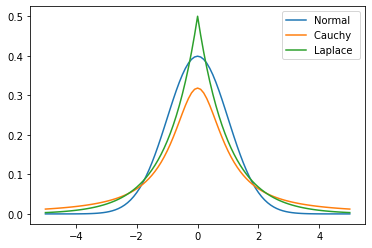

In [2]:
x = np.linspace(-5,5,101)

plt.plot(x,stats.norm().pdf(x), label = 'Normal ')
plt.plot(x,stats.cauchy().pdf(x), label = 'Cauchy ')
plt.plot(x, stats.laplace().pdf(x), label = 'Laplace ')
plt.legend()

plt.show()

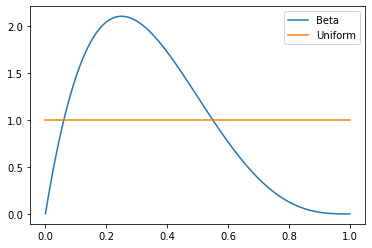

In [3]:
x = np.linspace(0, 1, 101)
plt.plot(x, stats.beta(2, 4).pdf(x), label='Beta')
plt.plot(x, stats.uniform().pdf(x), label='Uniform')
plt.legend()
plt.show()

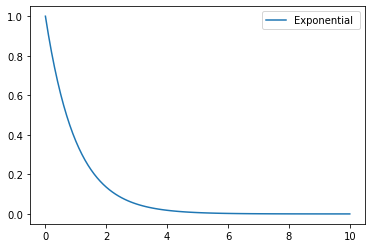

In [4]:
x = np.linspace(0, 10, 101)
plt.plot(x, stats.expon().pdf(x), label='Exponential ')
plt.legend()

plt.show()

The below example of estimating the bias of a coin given a sample consisting of $n$ tosses used to illustrate a few of the approaches.
If we use a beta distribution as the prior, then the posterior distribution has a closed form solution. Some general points:
We need to choose a prior distribution family (i.e. the beta here) as well as its parameters (here a=10, b=10)
The prior distribution may be relatively uninformative (i.e. more flat) or informative (i.e. more peaked)
The posterior depends on both the prior and the data
As the amount of data becomes large, the posterior approximates the MLE
An informative prior takes more data to shift than an uninformative one
Of course, it is also important the model used (i.e. the likelihood) is appropriate for the fitting the data
The mode of the posterior distribution is known as the maximum a posteriors (MAP) estimate (cf MLE which is the mode of the likelihood)


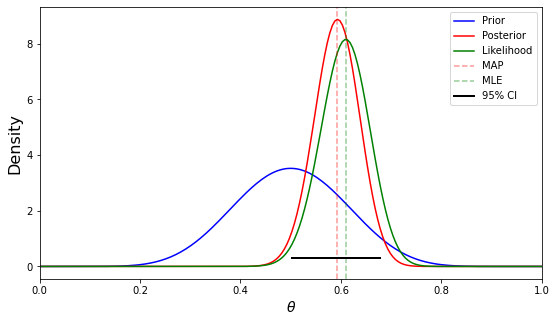

In [5]:
n = 100    # Number of tosses
h = 61     # Number of heads
p = h/n    # Heads Probability
a, b = 10, 10

rv = stats.binom(n, p)  # to create the normal distribution for the heads probability
mu = rv.mean()

thetas = np.linspace(0, 1, 200)

prior = stats.beta(a, b)   
post = stats.beta(h+a, n-h+b)   # the posterior is a close form on the beta distribution
likelihood = n*stats.binom(n, thetas).pmf(h)
ci = post.interval(0.95)

plt.figure(figsize=(9, 5))
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.plot(thetas,likelihood , label='Likelihood', c='green')
plt.axvline((h+a-1)/(n+a+b-2), c='red', linestyle='dashed', alpha=0.4, label='MAP')
plt.axvline(mu/n, c='green', linestyle='dashed', alpha=0.4, label='MLE')
plt.xlim([0, 1])
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

# 2- Conjugate Priors:
So, at the beginning when i started writing these notes i thought that the prior and the posterior will be on a close form, my view of the marginal likelihood function was that it will never transform the prior too much for it to " i want to say this simply (shifting its shape)". when i digged deeper after your question i found allot of issue with my simple understanding for this problem.

### Definition :

" we start by selecting the prior from a certain distributution for some likelihood functions, if the posterior ends up being in the same distribution as the prior. then this prior then is called a Conjugate Prior."[5]


in a nutshell i was too naive to think that the solution will always be closed form due to the nature of the bayesian computation and its complexity . i found these examples explained this issue more to me:

Example 1 :

if we used a beta distribution as a prior over a binomial likelihood function the posterior will also end up being a beta distribution.

Proof :

from the bayes theorem 

$$
P(\theta|X) = \frac{P(X|\theta) P(\theta)}{P(X)}.
$$

where $ P(X) = \int P(X|\theta) P(\theta) \,\text{d}\theta.$

we can use the basic definitions of the beta and the binomial distributions :

$ g(\theta) = \frac {1}{B(\alpha,\beta)} \theta ^ {\alpha - 1} (1- \theta )^ {\beta - 1} $    Beta Distribution 

$ f(x) = $ $n \choose x $ $ \theta ^ x (1- \theta)^{n-x}$   Binomial Distribution

by substituting in the general bayes equation :

$$
P(\theta|X) = \frac{{n\choose x}  \theta ^ x (1- \theta)^{n-x} .  \frac {1}{B(\alpha,\beta)} \theta ^ {\alpha - 1} (1- \theta )^ {\beta - 1}}{\int _ {0}^{1} {n\choose x}  \theta ^ x (1- \theta)^{n-x} .  \frac {1}{B(\alpha,\beta)} \theta ^ {\alpha - 1} (1- \theta )^ {\beta - 1} \,\text{d}\theta}
$$

$$
P(\theta|X) = \frac {\frac {nCx}{B(\alpha,\beta)}\theta ^ {x+\alpha-1} (1- \theta)^{n-x+\beta -1}}{\frac {nCx}{B(\alpha,\beta)} \int _ {0}^{1}   \theta ^ {x+ \alpha -1} (1- \theta)^{n-x+ \beta -1}\,\text{d}\theta}
$$

and finally :
$$
P(\theta|X) = \frac {\theta ^ {x+\alpha-1} (1- \theta)^{n-x+\beta -1}}{B (x+ \alpha -1, n-x+ \beta -1)}
$$
which indicate that the posterior is also a beta distribution with the parameters $(x+\alpha,n-x+\beta)$ by simply thinking about what the normalizing factor for the numerator must be and it could be written as $P(\theta|x+ \alpha, n-x+ \beta)$ .


the figure below illustrate the same issue for a Beta type prior and Bernoulli likelihood function which will also yield in a Beta posterior. also, showing that the mean of the posterior is a weighted combination of the mean of the prior and the proportion of heads in the data in acoin flip example.[3]

![title](prior.png)[3]






# 3- The Central Limit Theorem and the Law of Large Numbers :

Let $Z_i$ be $N$ independent samples from some probability distribution. According to *the Law of Large numbers*,  so long as the expected value $E[Z]$ is finite, the following holds,

$$\frac{1}{N} \sum_{i=1}^N Z_i \rightarrow E[ Z ],  \;\;\; N \rightarrow \infty.$$

In words:

>   The average of a sequence of random variables from the same distribution converges to the expected value of that distribution.

This may seem like a boring result, but it will be the most useful tool you use.

as a cool intro to the sampling issues, the central limit theorem is an intuition from the law of the large number: 

> The Central Limit Theorem states that the sampling distribution of the sample means approaches a Normal Distribution as the sample size gets larger, regardless of the shape of the population distribution.

the below code simulate the coin flip 500 times using the binomial distribution data and 0.5 as average, with a 1000 sample the histogram of the distribution will reflect how the distribution will peak at 0.5.[4]



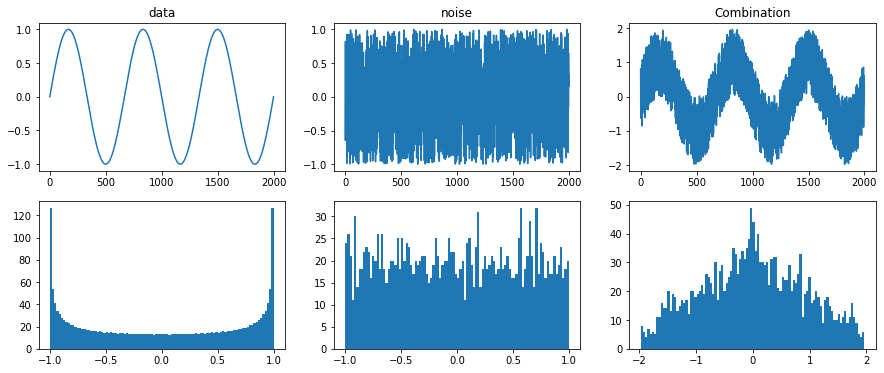

In [6]:
import seaborn as sns

#Create Some Date and Some noise to test the distribution of them
x = np.linspace(0,6*np.pi,2000)
data = np.sin(x)

noise = np.random.rand(2000)*2-1


fig,ax = plt.subplots(2,3, figsize = (15,6))

ax[0,0].plot(data)
ax[1,0].hist(data,100)
ax[0,0].set_title('data')

ax[0,1].plot(noise)
ax[1,1].hist(noise,100)
ax[0,1].set_title('noise')

ax[0,2].plot(data+noise)
ax[1,2].hist(data+noise,100)
ax[0,2].set_title('Combination')

plt.show()
    

We Can see that desthetate the noise effect on the data on the combination plot put still the final distribution lean toward a gaussian shape due to the amount of data points.
the below figure illustrate this perfectly:

C:\Users\Mohanned Khairy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


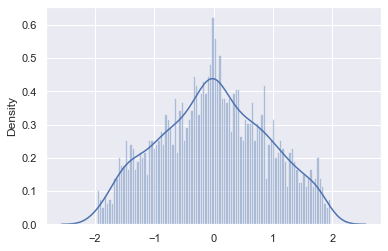

In [7]:
sns.set()
sns.distplot(data+noise,100)

plt.show()

## Evaluate the effect of number of data points :

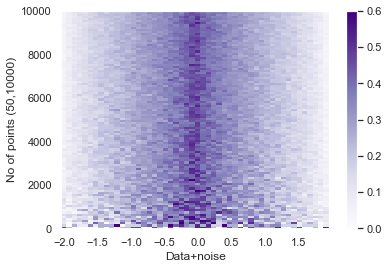

In [8]:
# create a range for the n data points

n_points = np.arange(50,10000,100)

# create data and noise for the all n points
hist_total = np.zeros((len(n_points),50))
for n in range(len(n_points)):
    data = np.sin(np.linspace(0,6*np.pi,n_points[n]))
    noise = np.random.rand(n_points[n])*2-1
    hist_total[n,:],z = np.histogram(data+noise,50,density = True)
plt.pcolor(z[:-1],n_points,hist_total,vmax = 0.6,cmap='Purples',shading = 'auto')
plt.xlabel('Data+noise')
plt.ylabel('No of points (50,10000)')
plt.colorbar()

plt.show()

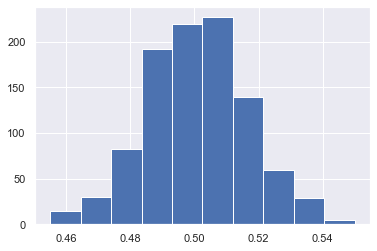

In [9]:
data = stats.binom.rvs(1000,0.5, size=1000)/1000   # Simulate a coin flip 500 times and take 1000 sample from it, normalize it then plot

plt.hist(data)
#plt.scatter(np.linspace(0,1,1000),data)
plt.show()



# 4- Sampling and the MonteCarlo Simulation :

What is random Sampling?

drawing samples from a PDF, p(x). is basically like a Function inversion. for example, Let x be a real random variable with a PDF, p(x), and a corresponding cumulative distribution function[4]
$$
F_x(x) = \int_{-\infty} ^ x p(\tau) d(\tau)
$$

It is known from probability theory that the random variable, u, defined as $u =  F_x(x)$ is uniformly distributed in the interval 0 ≤ u ≤ 1 irrespective of the nature of p(x)  If, in addition, we assume that the function $F_x$ has an inverse, $F_x^{-1}$, then: 
$$ x = F_x^{-1}(u)$$

Thus, following the reverse arguments, samples from p(x) can be generated by first generating samples from the uniform distribution, $U(u|0, 1)$, and then applying on them the inverse function, $F_x^{-1}$.
This method works well provided that Fx has an inverse that can be easily computed. However, only a few PDFs can be “proud” of having inverses that can be expressed in an analytical form.
Besides computational reasons, likely the strongest reason for returning samples is that we can easily use *The Law of Large Numbers* to solve otherwise intractable problems. I postpone this discussion for the next chapter. With the thousands of samples, we can reconstruct the posterior surface by organizing them in a histogram. 

The basis of a Monte Carlo simulation is that the probability of varying outcomes cannot be determined because of random variable interference. Therefore, a Monte Carlo simulation focuses on constantly repeating random samples to achieve certain results.

A Monte Carlo simulation takes the variable that has uncertainty and assigns it a random value. The model is then run and a result is provided. This process is repeated again and again while assigning the variable in question with many different values. Once the simulation is complete, the results are averaged together to provide an estimate.[4]

## MonteCarlo Simulation Example

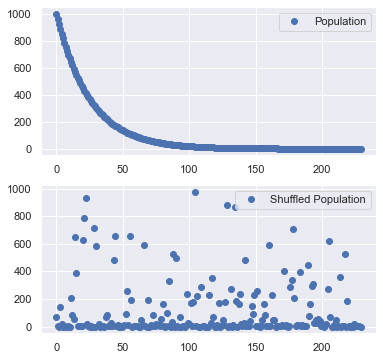

In [10]:
# population size, to simulate a decaying population 

p_size = 2.3e5

population = 1/np.logspace(np.log10(0.001), np.log10(10),int(p_size))

fig,ax = plt.subplots(2,1, figsize = (6,6))

ax[0].plot(population[::int(1e3)], 'o',label = 'Population') # to plot every 1000 point

ax[0].legend()
#to create randomness, the data will be shuffled

np.random.shuffle(population)


ax[1].plot(population[::int(1e3)], 'o',label ='Shuffled Population') # to plot every 1000 point but shuffled 
ax[1].legend()

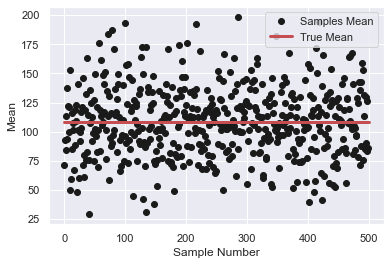

In [11]:
s_size = 50 # to generate 50 sample randomly for the population 
n = 500  # numbers of samples
true_mean = np.mean(population)


# Calculate the mean for each of the 500 samples andcompare to the true mean of the population
samplemean = np.zeros(n)
for i in range(n):
    sample = np.random.choice(population,size= s_size) # sample from the population with replacement is True
    samplemean[i] = np.mean(sample)

plt.plot(samplemean,'ko',label ='Samples Mean')
plt.plot([0,n],[true_mean,true_mean],'r',label = 'True Mean', linewidth = 3)
plt.xlabel('Sample Number')
plt.ylabel('Mean')
plt.legend()
plt.show()

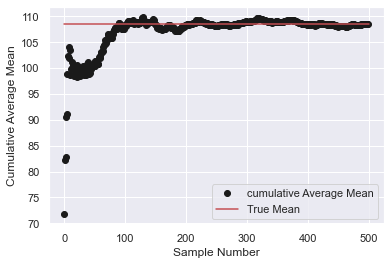

In [12]:
# to get the cumulative average mean for the points to test the tendency toward the true mean

average = np.cumsum(samplemean)/ np.arange(1,n+1)

plt.plot(average,'ko',label ='cumulative Average Mean')
plt.plot([0,n],[true_mean,true_mean],'r',label = 'True Mean')
plt.xlabel('Sample Number')
plt.ylabel('Cumulative Average Mean')
plt.legend()
plt.show()

# 5-  MCMC (Markov Chain MonteCarlo Algorithm) :


The idea behind MCMC is to perform an intelligent search of the space. To say "search" implies we are looking for a particular point, which is perhaps not an accurate as we are really looking for a broad mountain. 

Recall that MCMC returns *samples* from the posterior distribution, not the distribution itself. Stretching our mountainous analogy to its limit, MCMC performs a task similar to repeatedly asking  "How likely is this pebble I found to be from the mountain I am searching for?", and completes its task by returning thousands of accepted pebbles in hopes of reconstructing the original mountain. In MCMC and PyMC3 lingo, the returned sequence of "pebbles" are the samples,  cumulatively called the *traces*. 

MCMC intelligently searches means that MCMC will *hopefully* converge towards the areas of high posterior probability. MCMC does this by exploring nearby positions and moving into areas with higher probability. Again, perhaps "converge" is not an accurate term to describe MCMC's progression. Converging usually implies moving towards a point in space, but MCMC moves towards a *broader area* in the space and randomly walks in that area, thetacking up samples from that area.

There is a large family of algorithms that perform MCMC. Most of these algorithms can be expressed at a high level as follows:

1. Sample an initial value for $\theta_0$. Set $i = 0$.
2. Sample a *proposal* value, $\theta^\prime$, in the vicinity of $\theta_i$ using $\theta^\prime = \theta_i + \Delta\theta$ where $\Delta\theta$ is drawn from a suitable distribution.
3. Calculate the acceptance ratio, which is the ratio of the posterior evaluated at $\theta^\prime$ and $\theta_i$:
    $$
    r = \frac{p(X|\theta^\prime) p(\theta^\prime)}{p(X|\theta_i) p(\theta_i)}.
    $$
4. Accept or reject the proposal depending on
    - if $r \geq 1$ then set $\theta_{i+1} = \theta^\prime$ or
    - if $r < 1$ then set $\theta_{i+1} = \theta^\prime$ with probability $r$ otherwise set $\theta_{i+1} = \theta_i$.
5. Assign $i \leftarrow i + 1$ and return to step 2.

Step 2 is the "Markov Chain" component: the new value, $\theta^\prime$, depends only on the present value, $\theta$. There are a variety of proposal distributions, but a simple approach is to sample $\Delta\theta$ from a narrow Normal distribution.

Step 3 is where we get around calculating the evidence because it divides out in the ratio of posterior probabilities.

This way we move in the general direction towards the regions where the posterior distributions exist, and collect samples sparingly on the journey. Once we reach the posterior distribution, we can easily collect samples as they likely all belong to the posterior distribution. 

If the current position of the MCMC algorithm is in an area of extremely low probability, which is often the case when the algorithm begins (tythetacally at a random location in the space), the algorithm will move in positions *that are likely not from the posterior* but better than everything else nearby. Thus the first moves of the algorithm are not reflective of the posterior.

In the above algorithm's pseudo-code, notice that only the current position matters (new positions are investigated only near the current position). We can describe this property as *memory lessness*, i.e. the algorithm does not care *how* it arrived at its current position, only that it is there. 


Besides MCMC, there are other procedures available for determining the posterior distributions. A Laplace approximation is an approximation of the posterior using simple functions. A more advanced method is [Variational Bayes]. All three methods, Laplace Approximations, Variational Bayes, and classical MCMC have their pros and cons.

## Metropolis Hasting Algorithm :


The Metropolis Hastings algorithm is a simple algorithm for producing samples from distributions that may otherwise be difficult to sample from. To sample from a distribution $\theta$, which we will call the “target” distribution. [5]

For simplicity we assume that $\theta$ is a one-dimensional distribution on the real line, although it is easy to extend to more than one dimension.
The MH algorithm works by simulating a Markov Chain, whose stationary distribution is $\theta$. This means that, in the long run, the samples from the Markov chain look like the samples from $\theta$. As we will see, the algorithm is incredibly simple and flexible. Its main limitation is that, for difficult problems, “in the long run” may mean after a very long time. However, for simple problems the algorithm can work well.

To implement the MH algorithm, we must provide a “transition kernel”, $Q$. A transition kernel is simply a way of moving, randomly, to a new position in space $y$ say, given a current position $x$. That is, $Q$  is a distribution on $y$ given $x$, and we will write it $Q(y|x)$. In many applications $Q$ will be a continuous distribution, in which case $Q(y|x)$ will be a density on $y$, and so $ \int Q(y|x) dy =1$ (for all $x$).[3]

For example, a very simple way to generate a new position $y$ from a current position $x$ is to add an $N(0,1)$ random number to $x$. That is, set $y = x + N(0,1)$, or $(y|x) = N(x,1))$. So $Q(y | x) = 1/\sqrt{2\theta} \exp[-0.5(y-x)^2]$. \
This kind of kernel, which adds some random number to the current position $x$ to obtain $y$, is often used in practice and is called a “random walk” kernel.

Because of the role $Q$ plays in the MH algorithm , it is also sometimes called the “proposal distribution”. And the example given above would be called a “random walk proposal”.[3]

the Burn In period; 
the burn in period is the time it take for the chain to stabilized so that its not drifting up or down over time, this will decrease the chain dependency of the first value and will increase the convergence of the algorithm. 



## Applications and Examples :


 We know the current state $x_{n}$, and we want to generate $x_{n+1}$. This is a two steps process.[5]
 1st step is to generate a candidate $x^{*}$, which is generated from a proposal distribution $Q(X^{*} | x_{n})$ which depends on the current state of the Markov chain $x_{n}$. We need a distribution that is centred on $x_n$, so can use something like:

 $x^{*} | x_{n} \sim Normal(x_{n}, \sigma^{2})$ where we punch in our own $\sigma$.

 2nd step is the accept-reject step. We calculate an acceptance probability $A(x_{n} \to x^{*})$ which is given by:

$ A(x_{n} \to x^{*})   = min(1, \frac{P(x^{*})}{P(x_{n})}  \frac{Q(x_{n} | x^{*} )}{Q(x^{*} | x_{n})} )$ 

 $\frac{P(x^{*})}{P(x_{n})}$ is easy to compute, as we just plug the value of $x^{*}$ and $x_{n}$ in the numerator above.
 Looking at, $\frac{Q(x_{n} | x^{*} )}{Q(x^{*} | x_{n})}$  $Q(x^{*} | x_{n})$ tells us the probability of generating  $x^{*}$ as the candidate given the current state $ x_{n})$, which is what is happening now. The numerator tells us exactly the opposite. If the distribution is symmetric, then these 2 numbers will be the same and it will just become 1. This is the Metropolis algo, and it's a special case of the Metropolis-Hastings algorithm [3].


 We now have a candidate $x^{*}$ and calculated the acceptance probability $A(x_{n} \to x^{*}$, we have to either accept or reject this value. If we reject then $x_{n+1} = x_{n}$. This is easy. We just generate a random number from a uniformly distributed distribution between 0 and 1 which we call $u$ :[3]

$$ x_{n+1}  =  \begin{equation}
 \left\{ 
  \begin{aligned}
 x^{*} \quad \text{if} \quad u \leq A(x_{n} \to x^{*}) \\
 x_{n} \quad \text{if} \quad u > A(x_{n} \to x^{*}) \\
  \end{aligned}
  \right.
\end{equation}
$$

In [13]:
def target(lik, prior, n, h, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return lik(n, theta).pmf(h)*prior.pdf(theta)

n = 100   # Number of trials
h = 61    # Number of heads
a = 10
b = 10
lik = stats.binom
prior = stats.beta(a, b)
sigma = 0.3

naccept = 0
theta = 0.1
iter = 10000
samples = np.zeros(iter+1)
samples[0] = theta
for i in range(iter):
    theta_p = theta + stats.norm(0, sigma).rvs()
    rho = min(1, target(lik, prior, n, h, theta_p)/target(lik, prior, n, h, theta ))
    u = np.random.uniform()
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta
burn_in = len(samples)//2
print ("Efficiency = ", naccept/iter)

Efficiency =  0.1824


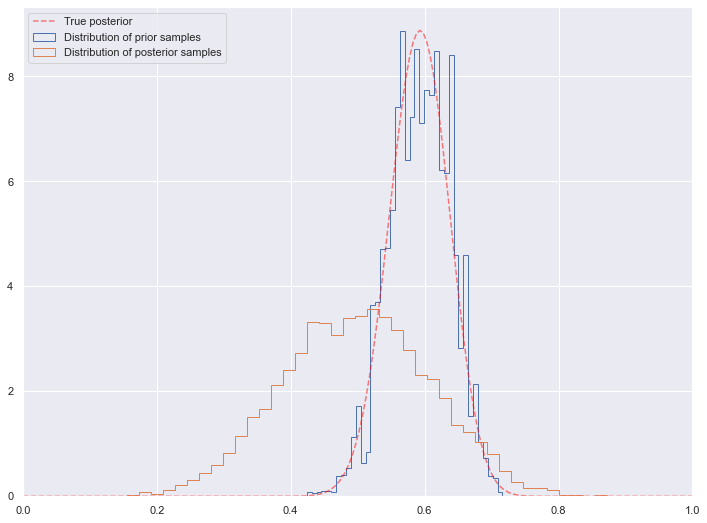

In [14]:
post = stats.beta(h+a, n-h+b)

plt.figure(figsize=(12, 9))
plt.hist(samples[burn_in:], 40, histtype='step',density= True,  linewidth=1, label='Distribution of prior samples');
plt.hist(prior.rvs(burn_in), 40, histtype='step',density= True, linewidth=1, label='Distribution of posterior samples');
plt.plot(thetas, post.pdf(thetas), c='red', linestyle='--', alpha=0.5, label='True posterior')
plt.xlim([0,1]);
plt.legend(loc='best');

No handles with labels found to put in legend.


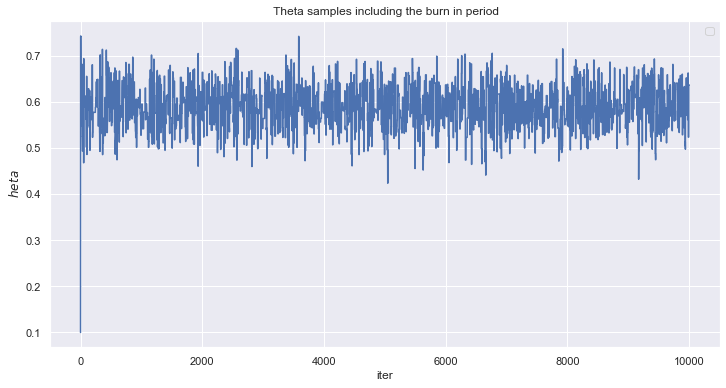

In [44]:
iter = np.arange(0,10001)
plt.figure(figsize=(12, 6))
plt.plot(iter,samples)
plt.ylabel(" $\theta$ ")
plt.xlabel('iter')
plt.title(' Theta samples including the burn in period')
plt.legend()

# 6-  The Lotka Vulterra Model:

Lotka (1925) and Volterra (1926) formulated parametric differential equations that characterize the oscillating populations of predators and prey. the equations are a pair of first-order nonlinear differential equations, frequently used to describe the dynamics of biological systems in which predators and prey interact.
![title](676px-Lotka_Volterra_dynamics.svg.png)

the equations expressed mathematicly as :
$$
\frac{dx}{dt} = \alpha x - \beta xy 
$$
$$
\frac{dy}{dt} =- \gamma y + \delta xy
$$

where:\
x is the number of prey. \
y is the number of some predator. 

$\frac{dx}{dt}$ and $\frac{dy}{dt}$  represent the instantaneous growth rates of the two populations. 

t represents time.\
α, β, γ, δ are positive real parameters describing the interaction of the two species.

The Lotka–Volterra model makes a number of assumptions, not necessarily realizable in nature, about the environment and evolution of the predator and prey populations:\
1- the prey food supply is limitless.\
2- the predator food supply depends on the size of the prey population.\
3-The rate of change of population is proportional to its size.\
4-During the process, the environment does not change in favour of one species, and genetic adaptation is not significant.\
5-Predators have limitless desire for the preys.\
In this case the solution of the differential equations is deterministic and continuous. This, in turn, implies that the generations of both the predator and prey are continually overlapping.



### Example :

### Population dynamics for baboons and cheetahs problem mentioned aside.

Suppose there are two species of animals, a baboon (prey) and a cheetah (predator). If the initial conditions are 10 baboons and 10 cheetahs, one can plot the progression of the two species over time; given the parameters that the growth and death rates of baboon are 1.1 and 0.4 while that of cheetahs are 0.4 and 0.1 respectively. The choice of time interval is arbitrary.

In [16]:
from scipy.integrate import odeint

def LotkaVolterra(y,t,p):
    x,y = y
    dxdt = alpha*x-beta*x*y
    dydt = -gamma*y +delta *x*y
    return [dxdt,dydt]

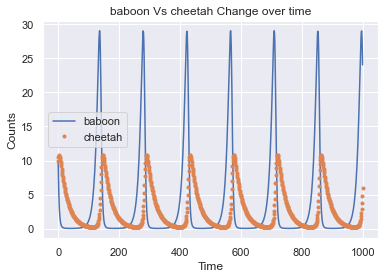

In [17]:
parameters = [1.1,.4,.4,.1,10,10]
alpha,beta,gamma,delta,Xt0,Yt0 = [z for z in parameters]

t = np.linspace(0,100,1000)
values = odeint(LotkaVolterra,[Xt0,Yt0],t,(parameters,))
#plt.figure(figsize=(10,4)
plt.plot(values[:,0],label = 'baboon')
plt.plot(values[:,1],'.', label = 'cheetah')
plt.xlabel("Time")
plt.ylabel("Counts")
plt.legend()
plt.title("baboon Vs cheetah Change over time");

For this specific choice of parameters, in each cycle, the baboon population is reduced to extremely low numbers, yet recovers (while the cheetah population remains sizeable at the lowest baboon density)

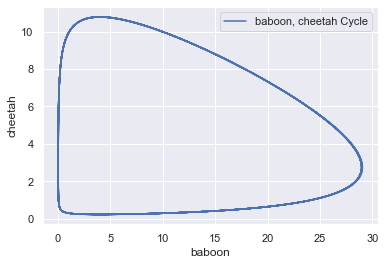

In [18]:
plt.plot(values[:,0],values[:,1],label = 'baboon, cheetah Cycle')
plt.xlabel("baboon")
plt.ylabel("cheetah")
plt.legend()

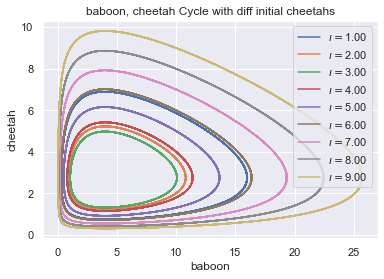

In [19]:
for i in range(1,10):   
    values = odeint(LotkaVolterra,[Xt0,i],t,(parameters,))
    plt.plot(values[:,0],values[:,1],label = r"$\i = $" + "{0:.2f}".format(i))
    plt.xlabel("baboon")
    plt.ylabel("cheetah")
    plt.title('baboon, cheetah Cycle with diff initial cheetahs')
    plt.legend()

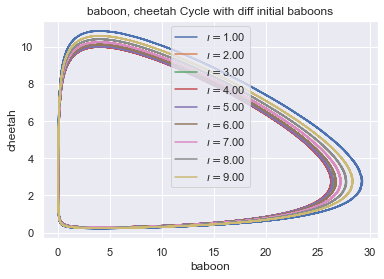

In [20]:
for i in range(1,10):   
    values = odeint(LotkaVolterra,[i,Yt0],t,(parameters,))
    plt.plot(values[:,0],values[:,1],label = r"$\i = $" + "{0:.2f}".format(i))
    plt.xlabel("baboon")
    plt.ylabel("cheetah")
    plt.title('baboon, cheetah Cycle with diff initial baboons')
    plt.legend()

### Parameters Approximation for the Lotka Volterrra equation using MH Algorithm :

https://mc-stan.org/users/documentation/case-studies/lotka-volterra-predator-prey.html

# References :

1- Peter D. Hoff "A First Course in Bayesian Statistical Methods" Springer Dordrecht Heidelberg London New York, ISSN 1431-875X, Springer Dordrecht Heidelberg London New York.2009

2- STATS 200: Introduction to Statistical Inference, Lecture 21 | Prior distributions, 2016

3- JOHN K. KRUSCHKE "Doing Bayesian Data Analysis A Tutorial with R, JAGS, and Stan"   Elsevier Academic Press , ISBN: 978-0-12-405888-0 , 2015.

4- Douglas Lind, Robert Deward Mason and William Marchal "Statistical Techniques in Business and Economics" McGrawHill ISBN 978-1-259-66636-0 2018

5- Introduction to Bayesian statistics, part 2: MCMC and the Metropolis–Hastings algorithm Available at  https://www.youtube.com/watch?v=OTO1DygELpY

6- Bob Carpenter " Predator-Prey Population Dynamics: the Lotka-Volterra model in Stan" 2018


7- Lotka- Volterra Equations available at (ttps://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)

8- Darren Wilkinson "Bayesian parameter and state estimation for partially observed nonlinear Markov process models using particle MCMC (with application to sysbio)" Mathematics of Data Assimilation Durham, UK 2011.